# Nhập môn khoa học dữ liệu đồ án cuối kỳ _ Nhóm 12

Thông tin nhóm:
- 22120367 - Lê Hồng Tiến
- 22120
- 22120
- 22120395 - Nguyễn Sinh Trực
- 22120399 - Nguyễn Lê Anh Tú


## Thu thập dữ liệu

## Khai báo các thư viện cần thiết

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## Tiền xử lý dữ liệu
### Đọc dữ liệu từ file vào dataframe.

In [4]:
file_name = 'arxiv_cs_papers_all.csv'
raw_df = pd.read_csv(file_name)
raw_df.head()

,paper_id,authors,updated,published,title,abstract,categories,comment
0,http://arxiv.org/abs/2411.15100v2,"Yixin Dong,Charlie F. Ruan,Yaxing Cai,Ruihang ...",2024-11-27 18:59:28,2024-11-22 18:01:37,XGrammar: Flexible and Efficient Structured Ge...,The applications of LLM Agents are becoming ...,"cs.CL,cs.AI,cs.PL",Not available
1,http://arxiv.org/abs/2411.18620v1,"Zhi Zhang,Srishti Yadav,Fengze Han,Ekaterina S...",2024-11-27 18:59:26,2024-11-27 18:59:26,Cross-modal Information Flow in Multimodal Lar...,The recent advancements in auto-regressive m...,"cs.AI,cs.CL,cs.CV",Not available
2,http://arxiv.org/abs/2411.18616v1,"Shengqu Cai,Eric Chan,Yunzhi Zhang,Leonidas Gu...",2024-11-27 18:58:52,2024-11-27 18:58:52,Diffusion Self-Distillation for Zero-Shot Cust...,Text-to-image diffusion models produce impre...,"cs.CV,cs.AI,cs.GR,cs.LG",Project page: https://primecai.github.io/dsd/
3,http://arxiv.org/abs/2411.07976v5,"Mahmut S. Gokmen,Caner Ozcan,Moneera N. Haque,...",2024-11-27 18:58:41,2024-11-12 17:55:39,DINO-LG: A Task-Specific DINO Model for Corona...,"Coronary artery disease (CAD), one of the le...","eess.IV,cs.AI,cs.CV",Developed by Center for Applied Artificial Int...
4,http://arxiv.org/abs/2411.18615v1,"Zhi Zhang,Jiayi Shen,Congfeng Cao,Gaole Dai,Sh...",2024-11-27 18:58:22,2024-11-27 18:58:22,Proactive Gradient Conflict Mitigation in Mult...,Advancing towards generalist agents necessit...,"cs.LG,cs.AI,cs.CV",Not available


### Có bao nhiêu dòng và cột của bộ dữ liệu thô này?

**Kiểm tra bộ dữ liệu đã đạt yêu cầu phải có ít nhất 5 cột và 1000 dòng hay chưa, nếu chưa thì ta sẽ cào bộ dữ liệu mới liên quan đến chủ đề này.**

In [5]:
#ta sẽ tính số dòng và số cột của DataFrame 'raw_df' và lưu trữ nó vào biến 'shape'.
shape = raw_df.shape

In [6]:
print(f"Kích thước dữ liệu hiện tại: {shape}")

if shape[0] >= 1000 and shape[1] >= 5:
    print("Dữ liệu của chúng ta đạt yêu cầu: đủ số dòng và số cột!")
else:
    print("Dữ liệu không đủ. Vui lòng chọn một tập dữ liệu khác!")

Kích thước dữ liệu hiện tại: (257881, 8)
Dữ liệu của chúng ta đạt yêu cầu: đủ số dòng và số cột!


### Mỗi dòng và cột có ý nghĩa gì?

 Mỗi dòng trong tập dữ liệu tương ứng với thông tin về một bài báo khoa học được công bố trên arXiv, bao gồm các cột:

- paper_id: Định danh bài báo, thường là một URL hoặc mã duy nhất của bài báo trên arXiv.
- authors: Danh sách tác giả của bài báo, mỗi tác giả được ngăn cách bởi dấu phẩy.
- updated: Thời gian cập nhật cuối cùng của bài báo, định dạng YYYY-MM-DD HH:MM:SS.
- published: Thời gian xuất bản lần đầu của bài báo, định dạng YYYY-MM-DD HH:MM:SS.
- title: Tiêu đề bài báo, cung cấp cái nhìn tổng quan về nội dung bài báo.
- abstract: Tóm tắt bài báo, cung cấp một đoạn ngắn mô tả nội dung chính.
- categories: Các danh mục mà bài báo thuộc về, giúp phân loại lĩnh vực nghiên cứu.
- comment: Ghi chú bổ sung hoặc thông tin thêm về bài báo (như là bài báo đã được đăng công khai trước đó ở đâu).

#### Dữ liệu thô có dòng nào bị trùng không?

In [7]:
#chúng ta tính toán số dòng bị trùng và lưu trữ nó vào biến 'num_duplicated_rows'.
num_duplicated_rows = raw_df[raw_df.duplicated()].shape[0]

In [8]:
if num_duplicated_rows == 0:
    print("Dữ liệu gốc của bạn không có dòng trùng lặp!")
else:
    if num_duplicated_rows > 1:
        ext = "lines"
    else:
        ext = "line"
    print(f"Dữ liệu gốc của bạn có {num_duplicated_rows} {ext} bị trùng lặp. Vui lòng loại bỏ các dòng trùng lặp!")

Dữ liệu gốc của bạn không có dòng trùng lặp!


In [9]:
raw_df

,paper_id,authors,updated,published,title,abstract,categories,comment
0,http://arxiv.org/abs/2411.15100v2,"Yixin Dong,Charlie F. Ruan,Yaxing Cai,Ruihang ...",2024-11-27 18:59:28,2024-11-22 18:01:37,XGrammar: Flexible and Efficient Structured Ge...,The applications of LLM Agents are becoming ...,"cs.CL,cs.AI,cs.PL",Not available
1,http://arxiv.org/abs/2411.18620v1,"Zhi Zhang,Srishti Yadav,Fengze Han,Ekaterina S...",2024-11-27 18:59:26,2024-11-27 18:59:26,Cross-modal Information Flow in Multimodal Lar...,The recent advancements in auto-regressive m...,"cs.AI,cs.CL,cs.CV",Not available
2,http://arxiv.org/abs/2411.18616v1,"Shengqu Cai,Eric Chan,Yunzhi Zhang,Leonidas Gu...",2024-11-27 18:58:52,2024-11-27 18:58:52,Diffusion Self-Distillation for Zero-Shot Cust...,Text-to-image diffusion models produce impre...,"cs.CV,cs.AI,cs.GR,cs.LG",Project page: https://primecai.github.io/dsd/
3,http://arxiv.org/abs/2411.07976v5,"Mahmut S. Gokmen,Caner Ozcan,Moneera N. Haque,...",2024-11-27 18:58:41,2024-11-12 17:55:39,DINO-LG: A Task-Specific DINO Model for Corona...,"Coronary artery disease (CAD), one of the le...","eess.IV,cs.AI,cs.CV",Developed by Center for Applied Artificial Int...
4,http://arxiv.org/abs/2411.18615v1,"Zhi Zhang,Jiayi Shen,Congfeng Cao,Gaole Dai,Sh...",2024-11-27 18:58:22,2024-11-27 18:58:22,Proactive Gradient Conflict Mitigation in Mult...,Advancing towards generalist agents necessit...,"cs.LG,cs.AI,cs.CV",Not available
...,...,...,...,...,...,...,...,...
257876,http://arxiv.org/abs/2305.13538v1,"Linwei Sang,Yinliang Xu,Hongbin Sun",2023-05-22 23:22:13,2023-05-22 23:22:13,Encoding Carbon Emission Flow in Energy Manage...,Decarbonizing the energy supply is essential...,"eess.SY,cs.SY",Not available
257877,http://arxiv.org/abs/2305.13463v1,"Taeju Lee,Minkyu Je",2023-05-22 20:10:56,2023-05-22 20:10:56,Trend Investigation of Biopotential Recording ...,This paper presents the trend of biopotentia...,"eess.SY,cs.SY,eess.SP",Not available
257878,http://arxiv.org/abs/2211.01527v2,"J. Brian Burns,Aravind Sundaresan,Pedro Sequei...",2023-05-22 19:53:33,2022-11-03 00:03:14,Sensor Control for Information Gain in Dynamic...,We present an approach for autonomous sensor...,"cs.AI,cs.CV,cs.SY,eess.SY,I.2.8; I.2.6; I.5.4",13 pages
257879,http://arxiv.org/abs/2305.13215v1,"Kamal Basulaiman,Masoud Barati",2023-05-22 16:46:37,2023-05-22 16:46:37,Sequence-to-Sequence Forecasting-aided State E...,Power system state forecasting has gained mo...,"eess.SY,cs.LG,cs.SY",Not available


#### Kiểm tra số lượng dòng thiếu dữ liệu trong toàn bộ DataFrame

In [10]:
missing_rows = raw_df.isnull().any(axis=1).sum()

if missing_rows > 0:
    print(f"Có {missing_rows} dòng bị thiếu dữ liệu ở ít nhất một cột. Vui lòng xử lý!")
else:
    print("Dữ liệu hoàn chỉnh, không có dòng nào bị thiếu dữ liệu.")

Có 23 dòng bị thiếu dữ liệu ở ít nhất một cột. Vui lòng xử lý!


#### In ra dòng bị thiếu dữ liệu

In [11]:
missing_data = raw_df[raw_df.isnull().any(axis=1)]
print(missing_data)

                                 paper_id  \
4257    http://arxiv.org/abs/2411.00826v1   
48670   http://arxiv.org/abs/2408.16885v1   
52211   http://arxiv.org/abs/2402.19107v1   
52545   http://arxiv.org/abs/2402.06516v1   
62730   http://arxiv.org/abs/2409.08170v1   
69957   http://arxiv.org/abs/2112.08910v3   
71032   http://arxiv.org/abs/2201.03052v1   
136687  http://arxiv.org/abs/2308.15509v1   
142540  http://arxiv.org/abs/2307.07321v2   
143676  http://arxiv.org/abs/2304.08597v1   
145893  http://arxiv.org/abs/2201.12544v1   
152330  http://arxiv.org/abs/2309.08441v1   
184163  http://arxiv.org/abs/2407.16091v1   
192388  http://arxiv.org/abs/2312.01150v4   
196844  http://arxiv.org/abs/1803.11410v3   
206593  http://arxiv.org/abs/2010.13852v1   
223223  http://arxiv.org/abs/2406.00009v1   
232802  http://arxiv.org/abs/2303.00069v1   
242425  http://arxiv.org/abs/2109.11896v2   
242696  http://arxiv.org/abs/2109.12442v1   
243949  http://arxiv.org/abs/2409.02702v2   
250082  ht

Ở đây ta có thể thấy cột comment của 13 dòng này không có thông tin và đang là NaN, có thể xử lý bằng cách xóa 13 dòng này hoặc điền và 13 dòng này ở cột commet là 'không có thông tin' 

In [12]:
# điền vào commet của 13 cột 
raw_df['comment'] = raw_df['comment'].fillna('Not available')

Kiểm tra xem còn thiếu dữ liệu hay không?

In [13]:
missing_rows = raw_df.isnull().any(axis=1).sum()

if missing_rows > 0:
    print(f"Có {missing_rows} dòng bị thiếu dữ liệu ở ít nhất một cột. Vui lòng xử lý!")
else:
    print("Dữ liệu hoàn chỉnh, không có dòng nào bị thiếu dữ liệu.")

Dữ liệu hoàn chỉnh, không có dòng nào bị thiếu dữ liệu.


#### Kiểu dữ liệu của mỗi cột hiện tại là gì? Có bao nhiêu cột có kiểu dữ liệu không phù hợp cho việc phân tích sau này?

In [14]:
# chúng ta sẽ xem xét kiểu dữ liệu (dtype) của mỗi cột trong DataFrame 'raw_df' 
# và lưu kết quả vào Series 'dtypes' (Series này có index là tên cột trong DataFrame).
dtypes = raw_df.dtypes

In [15]:
dtypes

paper_id      object
authors       object
updated       object
published     object
title         object
abstract      object
categories    object
comment       object
dtype: object

Hiện tại, chúng ta thấy rằng cột update và published đang ở dạng chuỗi (object). Đây là cột thể hiện ngày tháng, nên chuyển sang kiểu dữ liệu datetime sẽ giúp:

Dễ dàng thực hiện các phép tính liên quan đến thời gian (ví dụ: so sánh ngày, tính khoảng cách giữa các ngày).
Hỗ trợ trực quan hóa dữ liệu dạng chuỗi thời gian (time-series).

Ở cột categories đang là kiểu dữ liệu object cần chuyển qua category để phân loại hiệu quả hơn.

Các cột còn lại vẫn giữ nguyên object.

In [16]:
raw_df['updated'] = pd.to_datetime(raw_df['updated'])
raw_df['published'] = pd.to_datetime(raw_df['published'])
raw_df['categories'] = raw_df['categories'].astype('category')

In [17]:
dtypes = raw_df.dtypes
dtypes

paper_id              object
authors               object
updated       datetime64[ns]
published     datetime64[ns]
title                 object
abstract              object
categories          category
comment               object
dtype: object

### Đối với mỗi cột có kiểu dữ liệu datetime64[ns], những giá trị trong các cột đó phân bố như thế nào?

In [18]:
# xem phân bố của các giá trị object.
non_numeric_columns = raw_df.select_dtypes(include='object').columns
unique_values = raw_df[non_numeric_columns].nunique()
print("Số lượng giá trị duy nhất trong mỗi cột non-numeric:")
print(unique_values)

# Tính các thống kê cho cột 'update'
count_u = raw_df['updated'].notnull().sum()  # Số lượng giá trị không thiếu
unique_u = raw_df['updated'].nunique()  # Số lượng giá trị duy nhất
top_u = raw_df['updated'].mode()[0]  # Giá trị xuất hiện nhiều nhất
freq_u = raw_df['updated'].value_counts().max()  # Số lần giá trị xuất hiện nhiều nhất
min_value_u = raw_df['updated'].min()  # Giá trị nhỏ nhất
max_value_u = raw_df['updated'].max()  # Giá trị lớn nhất
mean_u = raw_df['updated'].mean()  # Trung bình
std_u = raw_df['updated'].std()  # Độ lệch chuẩn
percentiles_u = raw_df['updated'].quantile([0.25, 0.5, 0.75])  # Các phân vị

# Tính các thống kê cho cột 'published'
count_p = raw_df['published'].notnull().sum()  # Số lượng giá trị không thiếu
unique_p = raw_df['published'].nunique()  # Số lượng giá trị duy nhất
top_p = raw_df['published'].mode()[0]  # Giá trị xuất hiện nhiều nhất
freq_p = raw_df['published'].value_counts().max()  # Số lần giá trị xuất hiện nhiều nhất
min_value_p = raw_df['published'].min()  # Giá trị nhỏ nhất
max_value_p = raw_df['published'].max()  # Giá trị lớn nhất
mean_p = raw_df['published'].mean()  # Trung bình
std_p = raw_df['published'].std()  # Độ lệch chuẩn
percentiles_p = raw_df['published'].quantile([0.25, 0.5, 0.75])  # Các phân vị

# In ra kết quả
print(f"Count_u: {count_u}, Count_p: {count_p}")
print(f"Unique_u: {unique_u}, unique_p: {unique_p} ")
print(f"Top_u: {top_u}, Top_p: {top_p}")
print(f"Freq_u: {freq_u}, Freq_p: {freq_p}")
print(f"Min_u: {min_value_u}, Min_p: {min_value_p}")
print(f"Max_u: {max_value_u}, Max_p: {max_value_p}")
print(f"Mean_u: {mean_u}, Mean_p: {mean_p}")
print(f"Std_u: {std_u}, Std_p:{std_p}")
print(f"25%_u: {percentiles_u[0.25]}, 25%_p: {percentiles_p[0.25]}")
print(f"50%_u: {percentiles_u[0.5]}, 50%_p: {percentiles_p[0.5]}")
print(f"75%_u: {percentiles_u[0.75]}, 75%_p: {percentiles_p[0.75]}")

Số lượng giá trị duy nhất trong mỗi cột non-numeric:
paper_id    257881
authors     230379
title       257753
abstract    257788
comment     100607
dtype: int64
Count_u: 257881, Count_p: 257881
Unique_u: 257550, unique_p: 257585 
Top_u: 2012-06-27 19:59:59, Top_p: 2012-06-27 19:59:59
Freq_u: 6, Freq_p: 6
Min_u: 1990-04-01 00:00:00, Min_p: 1990-04-01 00:00:00
Max_u: 2024-11-27 18:59:59, Max_p: 2024-11-27 18:59:59
Mean_u: 2021-11-05 03:47:50.417460224, Mean_p: 2021-07-28 01:38:12.083789824
Std_u: 1387 days 08:37:05.054382448, Std_p:1409 days 19:40:57.027689504
25%_u: 2020-11-16 15:52:15, 25%_p: 2020-06-27 02:28:44
50%_u: 2023-04-20 01:46:19, 50%_p: 2022-12-18 05:32:19
75%_u: 2024-05-29 10:23:52, 75%_p: 2024-03-18 11:07:58


Kết quả này cho thấy:

**Số lượng giá trị duy nhất trong các cột non-numeric**:
Các cột như paper_id, authors, title, và abstract có số lượng giá trị duy nhất rất cao (xấp xỉ gần với tổng số dòng). Điều này cho thấy:

- paper_id: Mỗi bài báo có một mã định danh duy nhất.
- authors: Tên tác giả có sự đa dạng rất lớn.
- title: Tiêu đề bài báo hầu hết không trùng lặp.
- abstract: Mô tả ngắn gọn bài báo cũng rất khác biệt.
Cột categories và comment có số lượng giá trị duy nhất ít hơn:

- categories: Có thể chỉ định phân loại theo một số nhóm nhất định (49947 loại khác nhau).
- comment: Một số bài báo không có bình luận hoặc bình luận bị trùng lặp.

**Các chỉ số thời gian liên quan đến hai giá trị (updated và published)**: 

Số lượng và giá trị duy nhất:

- Count_u và Count_p (257881): Tổng số bản ghi trong tập dữ liệu.
- Unique_u (257550) và unique_p (257585): Hầu hết các bản ghi đều có thời gian riêng biệt, chỉ một số ít bị trùng lặp.

**Phân bố thời gian**:
Khoảng thời gian:
- Min_u và Max_u: Dữ liệu trải dài từ năm 1990 đến 2024, cho thấy đây là dữ liệu lâu dài.
- Mean_u và Mean_p: Trung bình ngày nằm trong khoảng 2021, tập trung vào các nghiên cứu gần đây.
- Std_u (1387 ngày) và Std_p (1409 ngày): Thời gian phân phối khá đồng đều trong khoảng thời gian lớn (~4 năm).
Phân vị:
- 25%_u và 25%_p: 25% dữ liệu cũ hơn ngày 2020, còn lại là dữ liệu sau đó.
- 50%_u và 50%_p (median): Giá trị trung vị của dữ liệu rơi vào 2022-2023, cho thấy dữ liệu khá hiện đại.
- 75%_u và 75%_p: Phần lớn dữ liệu thuộc giai đoạn 2024.

### Đối với mỗi cột có kiểu dữ liệu non-numeric, những giá trị trong các cột đó phân bố như thế nào?

- Tính tỷ lệ phần trăm các giá trị bị thiếu (missing values): Tỷ lệ phần trăm từ 0 đến 100 của các ô bị thiếu dữ liệu trong từng cột.
- Số lượng các giá trị khác nhau (unique values): Ta đếm số lượng các loại giá trị khác nhau (số lượng phần tử phân biệt) trong cột. 

- Tỷ lệ phần trăm của từng giá trị khác nhau trong cột (không xét giá trị thiếu): Tính tỷ lệ phần trăm của mỗi giá trị trong tổng số giá trị không bị thiếu. Sắp xếp tỷ lệ theo thứ tự giảm dần.

- Lưu kết quả này vào dạng dictionary, trong đó: Key là các giá trị khác nhau trong cột, Value là tỷ lệ phần trăm của từng giá trị.


In [19]:
cat_cols = raw_df.select_dtypes(exclude=['datetime64[ns]'])
cat_col_info_df = pd.DataFrame(index=["missing_ratio", "num_values", "value_ratios"], columns=cat_cols.columns)
for col in cat_cols.columns:
    missing_ratio = cat_cols[col].isna().mean() * 100

    num_values = cat_cols[col].nunique(dropna=True)

    value_ratios = cat_cols[col].value_counts(normalize=True, dropna=True) * 100
    value_ratios = value_ratios.round(1).to_dict()

    cat_col_info_df.at["missing_ratio", col] = round(missing_ratio, 1)
    cat_col_info_df.at["num_values", col] = num_values
    cat_col_info_df.at["value_ratios", col] = value_ratios

In [20]:
cat_col_info_df

,paper_id,authors,title,abstract,categories,comment
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0
num_values,257881,230379,257753,257788,49947,100607
value_ratios,"{'http://arxiv.org/abs/2305.12999v1': 0.0, 'ht...","{'Oliver Knill': 0.0, 'David Eppstein': 0.0, '...",{'Data Preservation in High Energy Physics': 0...,{' This submission has been withdrawn at the ...,"{'cs.SE': 1.7, 'cs.CV': 1.6, 'cs.RO': 1.6, 'ee...","{'Not available': 42.9, '10 pages': 0.2, '12 p..."


- Dữ liệu có tính đa dạng cao với nhiều giá trị khác nhau trong các cột.

- Một số cột chứa giá trị phổ biến với tỷ lệ cao, trong khi các giá trị còn lại có tỷ lệ rất thấp.

- Sự xuất hiện của 'Not available' với tỷ lệ lớn trong một cột có thể ảnh hưởng đến kết quả phân tích sau này và cần được xử lý hoặc xem xét kỹ hơn.

### Dữ liệu được thu thập có hợp lý chưa?

In [21]:
raw_df

,paper_id,authors,updated,published,title,abstract,categories,comment
0,http://arxiv.org/abs/2411.15100v2,"Yixin Dong,Charlie F. Ruan,Yaxing Cai,Ruihang ...",2024-11-27 18:59:28,2024-11-22 18:01:37,XGrammar: Flexible and Efficient Structured Ge...,The applications of LLM Agents are becoming ...,"cs.CL,cs.AI,cs.PL",Not available
1,http://arxiv.org/abs/2411.18620v1,"Zhi Zhang,Srishti Yadav,Fengze Han,Ekaterina S...",2024-11-27 18:59:26,2024-11-27 18:59:26,Cross-modal Information Flow in Multimodal Lar...,The recent advancements in auto-regressive m...,"cs.AI,cs.CL,cs.CV",Not available
2,http://arxiv.org/abs/2411.18616v1,"Shengqu Cai,Eric Chan,Yunzhi Zhang,Leonidas Gu...",2024-11-27 18:58:52,2024-11-27 18:58:52,Diffusion Self-Distillation for Zero-Shot Cust...,Text-to-image diffusion models produce impre...,"cs.CV,cs.AI,cs.GR,cs.LG",Project page: https://primecai.github.io/dsd/
3,http://arxiv.org/abs/2411.07976v5,"Mahmut S. Gokmen,Caner Ozcan,Moneera N. Haque,...",2024-11-27 18:58:41,2024-11-12 17:55:39,DINO-LG: A Task-Specific DINO Model for Corona...,"Coronary artery disease (CAD), one of the le...","eess.IV,cs.AI,cs.CV",Developed by Center for Applied Artificial Int...
4,http://arxiv.org/abs/2411.18615v1,"Zhi Zhang,Jiayi Shen,Congfeng Cao,Gaole Dai,Sh...",2024-11-27 18:58:22,2024-11-27 18:58:22,Proactive Gradient Conflict Mitigation in Mult...,Advancing towards generalist agents necessit...,"cs.LG,cs.AI,cs.CV",Not available
...,...,...,...,...,...,...,...,...
257876,http://arxiv.org/abs/2305.13538v1,"Linwei Sang,Yinliang Xu,Hongbin Sun",2023-05-22 23:22:13,2023-05-22 23:22:13,Encoding Carbon Emission Flow in Energy Manage...,Decarbonizing the energy supply is essential...,"eess.SY,cs.SY",Not available
257877,http://arxiv.org/abs/2305.13463v1,"Taeju Lee,Minkyu Je",2023-05-22 20:10:56,2023-05-22 20:10:56,Trend Investigation of Biopotential Recording ...,This paper presents the trend of biopotentia...,"eess.SY,cs.SY,eess.SP",Not available
257878,http://arxiv.org/abs/2211.01527v2,"J. Brian Burns,Aravind Sundaresan,Pedro Sequei...",2023-05-22 19:53:33,2022-11-03 00:03:14,Sensor Control for Information Gain in Dynamic...,We present an approach for autonomous sensor...,"cs.AI,cs.CV,cs.SY,eess.SY,I.2.8; I.2.6; I.5.4",13 pages
257879,http://arxiv.org/abs/2305.13215v1,"Kamal Basulaiman,Masoud Barati",2023-05-22 16:46:37,2023-05-22 16:46:37,Sequence-to-Sequence Forecasting-aided State E...,Power system state forecasting has gained mo...,"eess.SY,cs.LG,cs.SY",Not available


#### Ở đây ta thấy ở cột paper_id là các đường dẫn URL ta có thể lọc lấy định danh duy nhất từ đường dẫn.

In [22]:
raw_df["paper_id"] = raw_df["paper_id"].str.split("/").str[-1]
raw_df

,paper_id,authors,updated,published,title,abstract,categories,comment
0,2411.15100v2,"Yixin Dong,Charlie F. Ruan,Yaxing Cai,Ruihang ...",2024-11-27 18:59:28,2024-11-22 18:01:37,XGrammar: Flexible and Efficient Structured Ge...,The applications of LLM Agents are becoming ...,"cs.CL,cs.AI,cs.PL",Not available
1,2411.18620v1,"Zhi Zhang,Srishti Yadav,Fengze Han,Ekaterina S...",2024-11-27 18:59:26,2024-11-27 18:59:26,Cross-modal Information Flow in Multimodal Lar...,The recent advancements in auto-regressive m...,"cs.AI,cs.CL,cs.CV",Not available
2,2411.18616v1,"Shengqu Cai,Eric Chan,Yunzhi Zhang,Leonidas Gu...",2024-11-27 18:58:52,2024-11-27 18:58:52,Diffusion Self-Distillation for Zero-Shot Cust...,Text-to-image diffusion models produce impre...,"cs.CV,cs.AI,cs.GR,cs.LG",Project page: https://primecai.github.io/dsd/
3,2411.07976v5,"Mahmut S. Gokmen,Caner Ozcan,Moneera N. Haque,...",2024-11-27 18:58:41,2024-11-12 17:55:39,DINO-LG: A Task-Specific DINO Model for Corona...,"Coronary artery disease (CAD), one of the le...","eess.IV,cs.AI,cs.CV",Developed by Center for Applied Artificial Int...
4,2411.18615v1,"Zhi Zhang,Jiayi Shen,Congfeng Cao,Gaole Dai,Sh...",2024-11-27 18:58:22,2024-11-27 18:58:22,Proactive Gradient Conflict Mitigation in Mult...,Advancing towards generalist agents necessit...,"cs.LG,cs.AI,cs.CV",Not available
...,...,...,...,...,...,...,...,...
257876,2305.13538v1,"Linwei Sang,Yinliang Xu,Hongbin Sun",2023-05-22 23:22:13,2023-05-22 23:22:13,Encoding Carbon Emission Flow in Energy Manage...,Decarbonizing the energy supply is essential...,"eess.SY,cs.SY",Not available
257877,2305.13463v1,"Taeju Lee,Minkyu Je",2023-05-22 20:10:56,2023-05-22 20:10:56,Trend Investigation of Biopotential Recording ...,This paper presents the trend of biopotentia...,"eess.SY,cs.SY,eess.SP",Not available
257878,2211.01527v2,"J. Brian Burns,Aravind Sundaresan,Pedro Sequei...",2023-05-22 19:53:33,2022-11-03 00:03:14,Sensor Control for Information Gain in Dynamic...,We present an approach for autonomous sensor...,"cs.AI,cs.CV,cs.SY,eess.SY,I.2.8; I.2.6; I.5.4",13 pages
257879,2305.13215v1,"Kamal Basulaiman,Masoud Barati",2023-05-22 16:46:37,2023-05-22 16:46:37,Sequence-to-Sequence Forecasting-aided State E...,Power system state forecasting has gained mo...,"eess.SY,cs.LG,cs.SY",Not available


Đến đây bộ dữ liệu có vẻ đã tốt, ta lưu lại bộ dữ liệu đã được làm sạch này vào file './data/cleaned_arxiv_cs_papers_all.csv'.

In [23]:
# save_file_name = 'cleaned_arxiv_cs_papers_all.csv'
# raw_df.to_csv(save_file_name, index = False)

#### Đọc dữ liệu đã làm sạch ở phần Preprocessing.

In [24]:
# file_name = 'cleaned_arxiv_cs_papers_all.csv'
# cleaned_df = pd.read_csv(file_name, parse_dates=['updated', 'published'])

## Khám phá dữ liệu

 ### 1. Số lượng chủ đề trong mỗi bài báo là bao nhiêu?

In [25]:
raw_df["topic_count"] = raw_df["categories"].apply(lambda x : len(x.split(',')))
raw_df["topic_count"].value_counts()

topic_count
2     85926
1     67318
3     58589
4     24802
5     10983
6      4799
7      2321
8      1343
9       735
10      457
11      248
12      134
13       77
14       50
15       28
17       26
16       14
18       11
19       10
23        3
20        3
22        2
26        1
21        1
Name: count, dtype: int64

In [ ]:
sns.countplot(raw_df["topic_count"])
plt.title("Number of topic in questions ")
plt.xlabel("Number of topic")
plt.ylabel("Frequency")


**Nhận xét:**
Dựa vào biểu đồ trực quan ở trên ta có thể nhận ra rằng đa phần mỗi bài báo đều có từ 1 đến 5 chủ đề là nhiều. Trong đó loại bài báo có hai chủ đề là nhiều nhất có 85926 bài báo có 2 chủ đề. Và có 1 bài báo có 26 chủ đề.

### 2. Số lượng bài báo có chủ đề công nghệ thông tin? Và từ đó cho thấy các lĩnh vực nghiên cứu nào xuất hiện nhiều nhất trong dữ liệu?

In [37]:
# Tách danh mục từ cột 'categories'
categories_series = raw_df['categories'].str.split(',')

# Làm phẳng danh sách các danh mục và loại bỏ khoảng trắng thừa
all_categories = []
for sublist in categories_series:
    for category in sublist:
        all_categories.append(category.strip())

# Đếm tần suất xuất hiện của từng danh mục
category_counts = Counter(all_categories)

# Tạo DataFrame từ kết quả đếm
category_counts_df = pd.DataFrame(category_counts.items(), columns=['Category', 'Count']).sort_values(by='Count', ascending=False)

# Lọc chỉ các danh mục bắt đầu với "cs."
cs_categories = category_counts_df[category_counts_df['Category'].str.startswith('cs.')].reset_index(drop=True)
cs_categories

,Category,Count
0,cs.LG,52560
1,cs.AI,38710
2,cs.CV,22989
3,cs.CL,19890
4,cs.CR,15116
5,cs.DS,14158
6,cs.DC,13202
7,cs.RO,13163
8,cs.SY,12918
9,cs.IT,12177


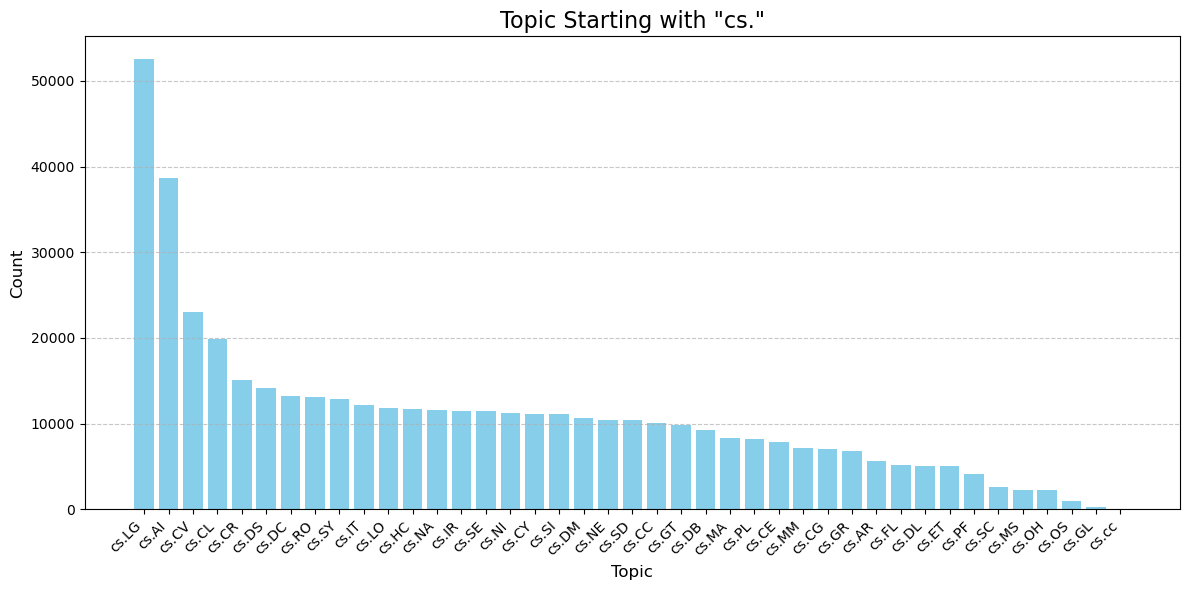

In [41]:
plt.figure(figsize=(12, 6))
plt.bar(cs_categories['Category'], cs_categories['Count'], color='skyblue')
plt.title('Topic Starting with "cs."', fontsize=16)
plt.xlabel('Topic', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Nhận xét:**
- Xu hướng nghiên cứu tập trung chủ yếu vào các lĩnh vực Machine Learning (cs.LG), AI (cs.AI), và Computer Vision (cs.CV).
- Các chủ đề liên quan đến bảo mật (cs.CR), thuật toán (cs.DS), và robot (cs.RO) cũng nhận được sự quan tâm đáng kể.
- Một số chủ đề truyền thống như Operating Systems (cs.OS) hoặc Computational Complexity (cs.CC) hiện có ít nghiên cứu hơn, phản ánh sự thay đổi ưu tiên trong cộng đồng khoa học máy tính.

### 3. Chủ đề công nghệ thông tin có bao phủ hết tập dữ liệu không?

Lọc đi những chủ đề không liên quan tới công nghệ thông tin vẫn giữ lại bài báo.

In [47]:
def filter_cs_categories(category_list):
    return [cat.strip() for cat in category_list if cat.strip().startswith('cs.')]

raw_df['categories'] = raw_df['categories'].str.split(',').apply(filter_cs_categories)

raw_df['categories'] = raw_df['categories'].apply(lambda x: ', '.join(x))

empty = raw_df['categories'].apply(lambda x: len(x.strip()) > 0).sum()

print(f"Số ô không trống trong cột 'categories': {empty}")



Số ô không trống trong cột 'categories': 257881


Vậy ta thấy số ô không trống ở categories là 257881 bằng với số ô ban đầu chưa xóa chủ đề, điều đó có nghĩa rằng là chủ đề công nghệ thông tin bảo phủ toàn bộ tập dữ liệu.

In [48]:
raw_df[['paper_id', 'categories']]

,paper_id,categories
0,2411.15100v2,"cs.CL, cs.AI, cs.PL"
1,2411.18620v1,"cs.AI, cs.CL, cs.CV"
2,2411.18616v1,"cs.CV, cs.AI, cs.GR, cs.LG"
3,2411.07976v5,"cs.AI, cs.CV"
4,2411.18615v1,"cs.LG, cs.AI, cs.CV"
...,...,...
257876,2305.13538v1,cs.SY
257877,2305.13463v1,cs.SY
257878,2211.01527v2,"cs.AI, cs.CV, cs.SY"
257879,2305.13215v1,"cs.LG, cs.SY"


Kiểm tra lại số lượng chủ đề tối đa có trong một bài báo và bài báo có bao nhiêu chủ đề là chiếm đa số?

In [51]:
raw_df["topic_count"] = raw_df["categories"].apply(lambda x : len(x.split(',')))
raw_df["topic_count"].value_counts()

1    126117
2     87259
3     34236
4      8607
5      1614
6        42
7         5
8         1
Name: topic_count, dtype: int64

/home/sinhtruc/miniconda3/envs/min_ds-env2/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

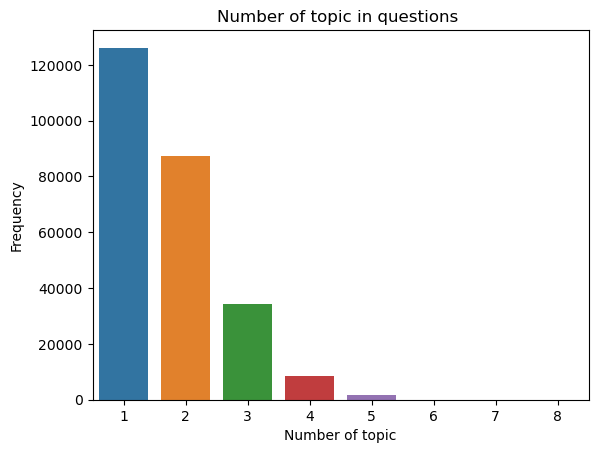

In [52]:
sns.countplot(raw_df["topic_count"])
plt.title("Number of topic in articles")
plt.xlabel("Number of topic")
plt.ylabel("Frequency")

### 4. Xu hướng xuất bản bài viết theo thời gian như thế nào? Có tăng lên theo từng năm hay không?

In [53]:
raw_df['published_year'] = raw_df['published'].dt.year
publication_trend = raw_df['published_year'].value_counts().sort_index()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(publication_trend.index, publication_trend.values, marker='o', linestyle='-')
plt.title("Xu hướng xuất bản bài viết theo thời gian", fontsize=16)
plt.xlabel("Năm", fontsize=12)
plt.ylabel("Số lượng bài viết", fontsize=12)
plt.grid(alpha=0.5)
plt.xticks(publication_trend.index, rotation=45)
plt.tight_layout()
plt.show()

**Nhận xét về xu hướng xuất bản bài viết theo thời gian:**

- Xu hướng tăng trưởng theo thời gian: Số lượng bài viết được xuất bản tăng rất ít và ổn định trong giai đoạn 1990 - 2010. Từ năm 2010 trở đi, số lượng bài viết bắt đầu tăng dần và có dấu hiệu tăng trưởng nhanh hơn. Giai đoạn 2017 - 2024 chứng kiến sự bùng nổ mạnh mẽ về số lượng bài viết, đặc biệt từ năm 2020 trở đi, đường biểu diễn cho thấy tốc độ tăng trưởng gần như theo cấp số nhân.

- Bùng nổ trong những năm gần đây (2020 - 2024): Số lượng bài viết tăng đột biến, từ khoảng 10,000 bài viết vào năm 2019 lên hơn 50,000 vào năm 2023. Năm 2024 dự đoán sẽ đạt mức kỷ lục, gần 80,000 bài viết.

**Nguyên nhân có thể dẫn đến sự tăng trưởng mạnh:**

- Phát triển công nghệ và trí tuệ nhân tạo (AI): Xu hướng nghiên cứu và xuất bản trong các lĩnh vực mới như AI, Machine Learning, và Khoa học dữ liệu thúc đẩy số lượng bài viết tăng mạnh.

- Mở rộng các nền tảng xuất bản trực tuyến: Các nền tảng mở như arXiv đã tạo điều kiện thuận lợi cho việc chia sẻ nghiên cứu nhanh chóng và rộng rãi.

- Sự gia tăng của các nhà nghiên cứu và tổ chức khoa học: Cộng đồng nghiên cứu khoa học ngày càng lớn mạnh và đóng góp nhiều bài viết hơn.

**Giai đoạn ổn định trước năm 2010:** Trước năm 2010, số lượng bài viết tăng rất chậm và ổn định, cho thấy mức độ xuất bản nghiên cứu khoa học còn hạn chế.

### 5. Top 10 tác giả có số lượng bài viết cao nhất?

In [56]:
author_counts = raw_df['authors'].value_counts()
top_10_authors = author_counts.head(10)
print("Top 10 tác giả có số lượng bài viết cao nhất:")
print(top_10_authors)

Top 10 tác giả có số lượng bài viết cao nhất:
Oliver Knill                       61
David Eppstein                     49
Maurice Margenstern                40
Tomoyuki Yamakami                  39
Sabah Al-Fedaghi                   33
J. A. Bergstra,C. A. Middelburg    33
Joseph O'Rourke                    32
Yong Wang                          31
Loet Leydesdorff                   31
Gilles Dowek                       30
Name: authors, dtype: int64


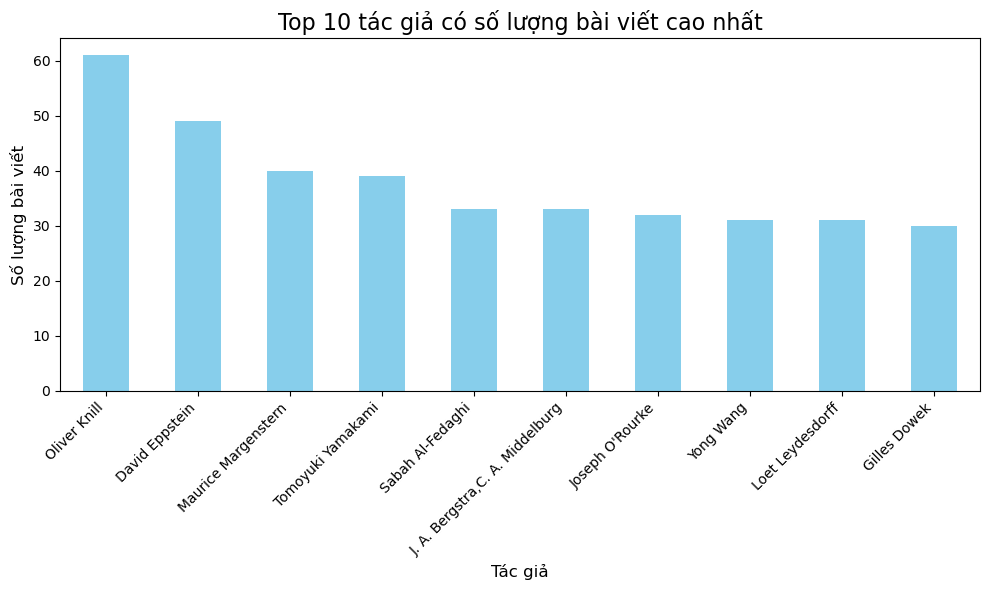

In [57]:
plt.figure(figsize=(10, 6))
top_10_authors.plot(kind='bar', color='skyblue')
plt.title('Top 10 tác giả có số lượng bài viết cao nhất', fontsize=16)
plt.xlabel('Tác giả', fontsize=12)
plt.ylabel('Số lượng bài viết', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Nhận xét:** 
- Phân bố đóng góp của tác giả: Biểu đồ thể hiện rõ mức độ đóng góp của từng tác giả vào số lượng bài viết trong danh sách được thống kê. Tác giả Oliver Knill có sự đóng góp lớn nhất, chiếm tỷ lệ nổi trội so với các tác giả còn lại.

- Nổi bật cá nhân: Oliver Knill và David Eppstein là hai cá nhân nổi bật với số lượng bài viết cao, cho thấy họ có thể là những nhà nghiên cứu hoạt động tích cực và có sức ảnh hưởng lớn trong lĩnh vực được thống kê.

- Đóng góp đồng đều ở các tác giả còn lại: Khoảng cách giữa các tác giả xếp từ vị trí thứ 3 đến thứ 10 tương đối nhỏ. Điều này cho thấy trong nhóm các nhà nghiên cứu hàng đầu, mức độ đóng góp khá đồng đều và không có sự chênh lệch lớn.

- Vai trò quan trọng của nghiên cứu khoa học: Số lượng bài viết cao có thể phản ánh: Năng suất làm việc cao của các tác giả, Mức độ tham gia của họ trong cộng đồng nghiên cứu và học thuật, Khả năng mở rộng và phát triển các chủ đề nghiên cứu liên quan.